<a href="https://colab.research.google.com/github/gplinkage/Data-Science-ML-AI/blob/main/Projects/Brain_Tumor_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Brain tumors, recognized as highly aggressive diseases affecting both children and adults, constitute 85 to 90 percent of all primary Central Nervous System (CNS) tumors. Annually, approximately 11,700 individuals receive a brain tumor diagnosis, with a 5-year survival rate of about 34 percent for men and 36 percent for women with cancerous brain or CNS tumors. The classification of brain tumors includes benign tumors, malignant tumors, pituitary tumors, among others. Effective treatment, meticulous planning, and precise diagnostics are essential to enhance the life expectancy of patients. Magnetic Resonance Imaging (MRI) stands out as the optimal technique for detecting brain tumors, generating substantial image data requiring examination by radiologists. Manual examination, however, can be error-prone due to the inherent complexities of brain tumors.

The application of automated classification techniques using Machine Learning (ML) and Artificial Intelligence (AI) consistently demonstrates higher accuracy compared to manual classification. Therefore, proposing a system that detects and classifies brain tumors using Deep Learning Algorithms, specifically Convolutional Neural Network (CNN), Artificial Neural Network (ANN), and Transfer Learning (TL), holds potential to significantly benefit doctors globally.

Context:

Brain tumors present inherent complexities in terms of size and location abnormalities, making a comprehensive understanding of their nature challenging. Additionally, the need for a skilled Neurosurgeon for MRI analysis poses difficulties, particularly in developing countries where a scarcity of proficient doctors and limited knowledge about tumors hinders timely report generation from MRIs. An automated system hosted on the Cloud emerges as a viable solution to address these challenges.

Definition:

The objective is to develop an automated system utilizing CNN and TL to Detect and Classify Brain Tumors, harnessing the capabilities of Deep Learning, and examining the tumor's position through segmentation. This technology aims to streamline and expedite the diagnostic process, particularly in regions facing a shortage of specialized medical expertise.

In [ ]:
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
from PIL import Image
import os
from IPython.display import display
import zipfile
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [ ]:
# Loading data and Image Augmentation
image_folder_path = '/content/drive/MyDrive/Data Science/All Raw-Data/Brain Tumor dataset'
image_files = [file for file in os.listdir('/content/drive/MyDrive/Data Science/All Raw-Data/Brain Tumor dataset/Training') if file.endswith('.jpg')]
for file in image_files:
  file_path = os.path.join('/content/drive/MyDrive/Data Science/All Raw-Data/Brain Tumor dataset/Training', file)
  image = Image.open(file_path)
  resized_image = image.resize((256, 256))
  resized_image.show()

In [ ]:
# Loading data and Image Augmentation
image_folder_path = '/content/drive/MyDrive/Data Science/All Raw-Data/Brain Tumor dataset'
image_files = [file for file in os.listdir(image_folder_path) if file.endswith('.jpg') or file.endswith('.png')]
for file in image_files:
  file_path = os.path.join(image_folder_path, file)
  image = Image.open(file_path)
  display(image)

In [ ]:
# Loading data and Image Augmentation
train_datagen = ImageDataGenerator(rescale=1.0/255)
train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/Data Science/All Raw-Data/Brain Tumor dataset/Training',
batch_size=30,
target_size=(150, 150))
validation_datagen = ImageDataGenerator(rescale=1.0/255)
validation_generator = validation_datagen.flow_from_directory('/content/drive/MyDrive/Data Science/All Raw-Data/Brain Tumor dataset/Testing', batch_size=30,
target_size=(150, 150))

Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


In [ ]:
labels_2=['glioma','meningioma','notumor','pituitary']

In [ ]:
# Display the count of each unique classes
labels = validation_generator.labels
labels_series = pd.Series(labels)
value_counts = labels_series.value_counts()
print(value_counts)

1    115
2    105
0    100
3     74
dtype: int64


In [ ]:
# Display the count of each unique classes
labels = train_generator.labels
labels_series = pd.Series(labels)
value_counts = labels_series.value_counts()
print(value_counts)

3    827
0    826
1    822
2    395
dtype: int64


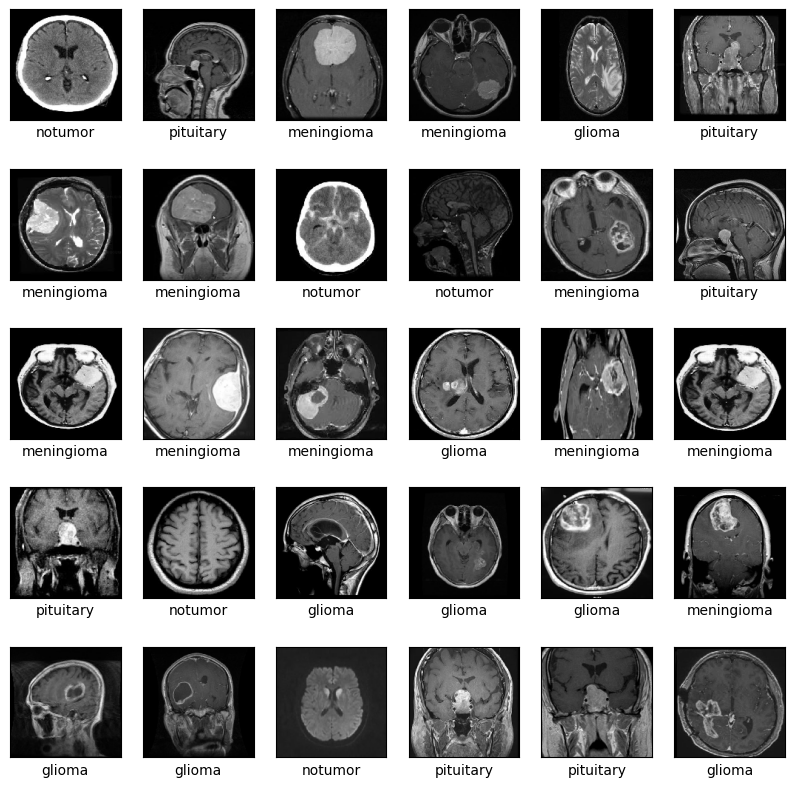

In [ ]:
# Display some images
i = 0
batch_size = validation_generator.batch_size
if i < len(validation_generator):
  batch_images, batch_labels = validation_generator[i]
  plt.figure(figsize=(10, 10))
  for idx in range(batch_size):
      plt.subplot(5, 6, idx + 1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)

      plt.imshow(batch_images[idx])
      class_index = np.argmax(batch_labels[idx])
      class_name = labels_2[class_index]
      plt.xlabel(class_name)

      if idx >= batch_size - 1:
        break
else:
 print("Invalid batch index!")

In [ ]:
# Building model
model=Sequential()
model.add(Conv2D(filters=50, kernel_size=5,
                  strides=1, activation='relu',
                  input_shape=(150,150,3)))

model.add(MaxPooling2D(pool_size=2,strides=2))

model.add(Conv2D(filters=100, kernel_size=5,
                strides=1, activation='relu'))

model.add(MaxPooling2D(pool_size=2,strides=2))
model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(150, activation='relu'))
model.add(Dense(4,activation='softmax'))

# Compiling the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
# Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 146, 146, 50)      3800      
                                                                 
 max_pooling2d (MaxPooling2  (None, 73, 73, 50)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 69, 69, 100)       125100    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 34, 34, 100)       0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 115600)            0         
                                                                 
 dropout (Dropout)           (None, 115600)            0

In [ ]:
# Training Model
history=model.fit(train_generator, epochs=10,validation_data=validation_generator)

Epoch 1/10
96/96 [==============================] - 1194s 12s/step - loss: 0.9979 - accuracy: 0.6157 - val_loss: 2.0980 - val_accuracy: 0.4492
Epoch 2/10
96/96 [==============================] - 11s 114ms/step - loss: 0.4365 - accuracy: 0.8359 - val_loss: 2.3052 - val_accuracy: 0.5939
Epoch 3/10
96/96 [==============================] - 11s 118ms/step - loss: 0.3086 - accuracy: 0.8826 - val_loss: 2.3721 - val_accuracy: 0.6421
Epoch 4/10
96/96 [==============================] - 11s 118ms/step - loss: 0.2019 - accuracy: 0.9216 - val_loss: 2.9309 - val_accuracy: 0.7132
Epoch 5/10
96/96 [==============================] - 11s 119ms/step - loss: 0.1343 - accuracy: 0.9477 - val_loss: 3.1821 - val_accuracy: 0.7335
Epoch 6/10
96/96 [==============================] - 13s 132ms/step - loss: 0.0997 - accuracy: 0.9676 - val_loss: 3.9862 - val_accuracy: 0.7386
Epoch 7/10
96/96 [==============================] - 11s 109ms/step - loss: 0.0547 - accuracy: 0.9808 - val_loss: 5.0762 - val_accuracy: 0.7234

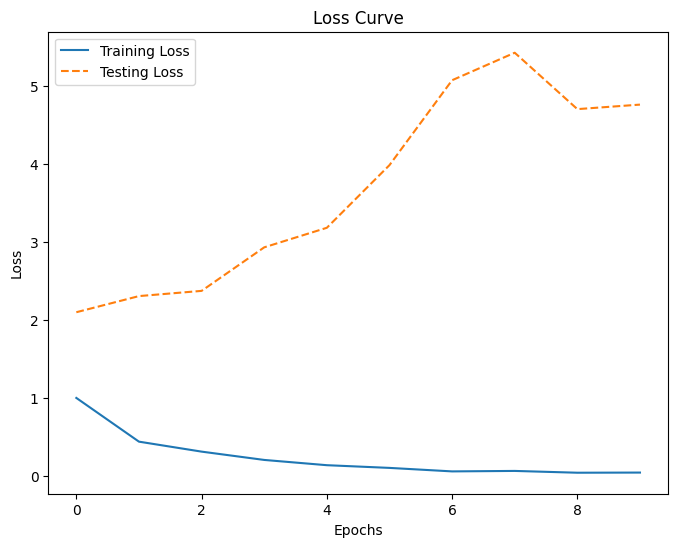

In [ ]:
# Loss Curves
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],ls='--')
plt.legend(['Training Loss','Testing Loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Loss Curve")
plt.show()

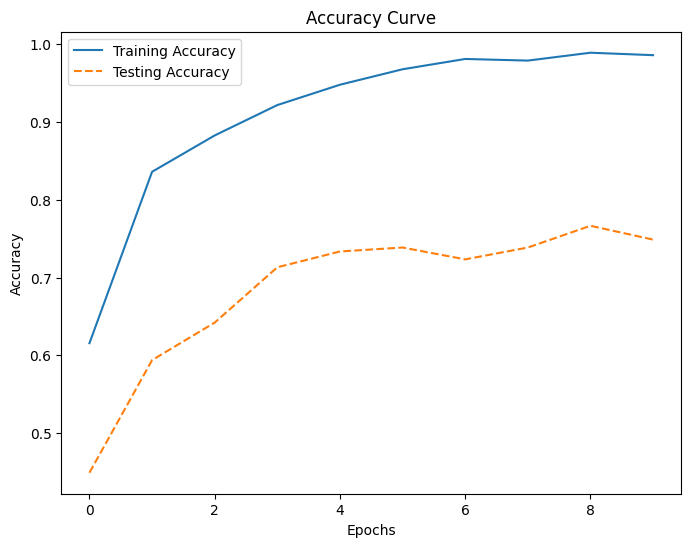

In [ ]:
# Accuracy Curves
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'],ls='--')
plt.legend(['Training Accuracy','Testing Accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Accuracy Curve")
plt.show()

In [ ]:
# Model Evaluation
model.evaluate(validation_generator)

14/14 [==============================] - 2s 109ms/step - loss: 4.7632 - accuracy: 0.7487


[4.763237953186035, 0.7487309575080872]

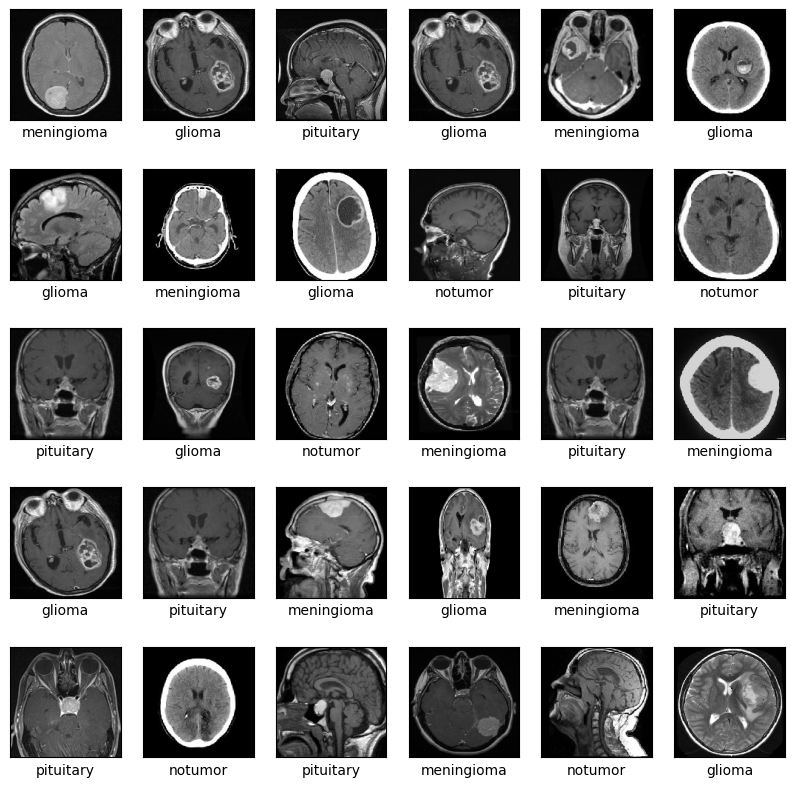

In [ ]:
# predict some records
i=0
batch_size = validation_generator.batch_size

if i < len(validation_generator):
      batch_images, batch_labels = validation_generator[i]
      plt.figure(figsize=(10,10))
      for idx in range(batch_size):
          plt.subplot(5, 6, idx + 1)
          plt.xticks([])
          plt.yticks([])
          plt.grid(False)
          plt.imshow(batch_images[idx])
          class_index = np.argmax(batch_labels[idx])
          class_name = labels_2[class_index]
          plt.xlabel(class_name)
          if idx >= batch_size - 1:
            break
else:
  print("Invalid batch index!")